## Neural Network for MNIST database of handwritten digits

### import libraries

In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### load data

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

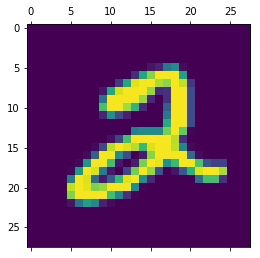

In [5]:
plt.matshow(x_train[5])

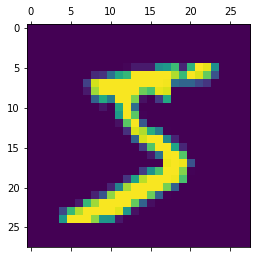

In [6]:
plt.matshow(x_train[0])

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# our data is present in range 0 - 255
# so we scale data between 0 to 1

x_train = x_train/255
x_test = x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## lets start building neural network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [11]:
model = tf.keras.models.Sequential()

In [12]:
# Flatten convert 2D array into 1D array
# this is input layer
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

# second layer called hidden layer
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))

# output layer  
# output layer has 10 neuron beacuse classification label or our categories is 10.
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [16]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 22s - loss: 0.0276 - acc: 0.9916    
Epoch 2/10
60000/60000 [==============================] - 24s - loss: 0.0232 - acc: 0.9924    
Epoch 3/10
60000/60000 [==============================] - 23s - loss: 0.0177 - acc: 0.9944    
Epoch 4/10
60000/60000 [==============================] - 23s - loss: 0.0154 - acc: 0.9950    
Epoch 5/10
60000/60000 [==============================] - 23s - loss: 0.0120 - acc: 0.9962    
Epoch 6/10
60000/60000 [==============================] - 24s - loss: 0.0123 - acc: 0.9960    
Epoch 7/10
60000/60000 [==============================] - 23s - loss: 0.0094 - acc: 0.9970    
Epoch 8/10
60000/60000 [==============================] - 23s - loss: 0.0085 - acc: 0.9972    
Epoch 9/10
60000/60000 [==============================] - 23s - loss: 0.0072 - acc: 0.9981    
Epoch 10/10
60000/60000 [==============================] - 23s - loss: 0.0083 - acc: 0.9970    


<p style="font-size:18px;color:blue;">this is very good accuracy of training process.</p>

In [17]:
model.evaluate(x_test,y_test)

 9664/10000 [===========================>..] - ETA: 0s

[0.095418759462866, 0.9792]

<p style="font-size:18px;color:red;">our test data accuracy is also very good.</p>

In [19]:
x_test.shape

(10000, 28, 28)